In [1]:
import torch
import os
import numpy as np
import json
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
from matplotlib import pyplot as plt

In [35]:
DATA_PATH = "/dtu/datasets1/02514/data_wastedetection"

class WasteDataset(Dataset):
    def __init__(self, transform=None):
        with open(os.path.join(DATA_PATH,'annotations.json')) as f:
            data = json.load(f)
        self.transform = transform if transform is not None else transforms.Compose([
            transforms.ToTensor()
            ])
        self.img_info = data['images']
        self.annotation = data['annotations']
    
    def __len__(self):
        return len(self.annotation)
    
    def __getitem__(self, idx):
        item = self.annotation[idx]
        src_img_file = self.img_info[item['image_id']]['file_name']
        src_img = Image.open(os.path.join(DATA_PATH,src_img_file))

        label = item['category_id']
        bbox = item['bbox']
        # print(bbox[0],bbox[1],bbox[2],bbox[3])
        bounding_box = [bbox[0], bbox[1], bbox[0]+bbox[2], bbox[1]+bbox[3]]
        # bounding_box = None
        if idx == 3:
            print(bbox[0],bbox[1],bbox[2],bbox[3])
        subimage = src_img.crop(bounding_box)

        return self.transform(subimage), label


632.0 987.0 500.0 374.0


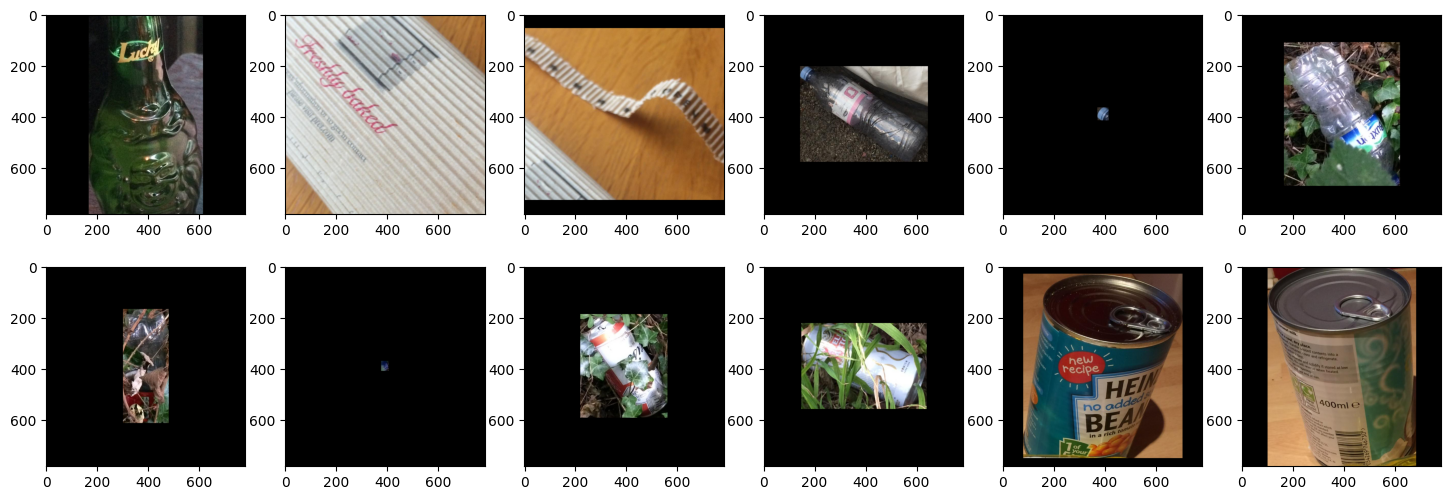

In [36]:
plt.rcParams['figure.figsize'] = [18, 6]
transform = transforms.Compose([
            transforms.CenterCrop((782,782)),
            transforms.ToTensor()
            ])
Data_loader = DataLoader(WasteDataset(transform=transform), 32)

images, labels = next(iter(Data_loader))

for i in range(12):
    plt.subplot(2, 6, i+1)
    plt.imshow(np.swapaxes(np.swapaxes(images[i], 0, 2), 0, 1))
plt.show()